In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans

In [2]:
#Loading dataset
file_path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\Eartquakes-1990-2023.csv"
df = pd.read_csv(file_path)

In [4]:
df.shape

(3445751, 12)

In [67]:
print(df.columns.tolist())

['time', 'place', 'status', 'tsunami', 'significance', 'data_type', 'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date']


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB
None


In [10]:
#Displaying the head of the dataset
print(df.head())

           time                                 place    status  tsunami  \
0  631153353990     12 km NNW of Meadow Lakes, Alaska  reviewed        0   
1  631153491210            14 km S of Volcano, Hawaii  reviewed        0   
2  631154083450            7 km W of Cobb, California  reviewed        0   
3  631155512130  11 km E of Mammoth Lakes, California  reviewed        0   
4  631155824490                16km N of Fillmore, CA  reviewed        0   

   significance   data_type  magnitudo        state   longitude   latitude  \
0            96  earthquake       2.50       Alaska -149.669200  61.730200   
1            31  earthquake       1.41       Hawaii -155.212333  19.317667   
2            19  earthquake       1.11   California -122.806167  38.821000   
3            15  earthquake       0.98   California -118.846333  37.664333   
4           134  earthquake       2.95   California -118.934000  34.546000   

    depth                              date  
0  30.100  1990-01-01 00:22:

In [11]:
#Removing duplicates from the dataset
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

Removed 16869 duplicate rows.


In [12]:
#Checking for missing values in the dataset
print(df.isnull().sum())

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64


In [13]:
#Handling missing values
for col in df.columns:
    if df[col].isnull().all():
        continue  
    elif df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Akshaya\AppData\Local\Temp\ipykernel_24704\2670711188.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Akshaya\AppData\Local\Temp\ipykernel_24704\2670711188.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [14]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

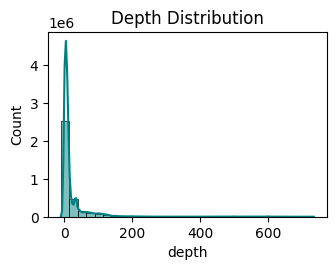

In [15]:
#Histogram for depth distribution
plt.subplot(2, 2, 1)
sns.histplot(df['depth'], bins=30, kde=True, color='teal')
plt.title('Depth Distribution')
plt.tight_layout()
plt.show()

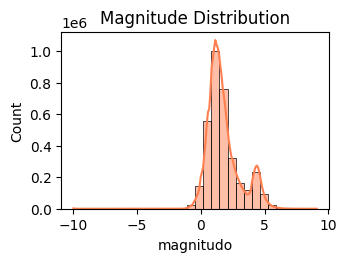

In [16]:
#Histogram for magnitude distribution
plt.subplot(2, 2, 2)
sns.histplot(df['magnitudo'], bins=30, kde=True, color='coral')
plt.title('Magnitude Distribution')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Latitude')

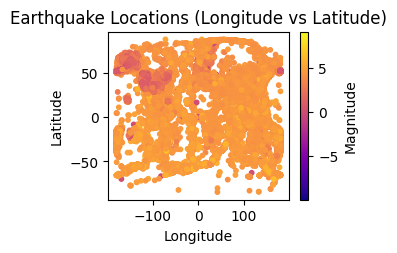

In [17]:
#Geospatial Distribution - Longitude vs Latitude
plt.subplot(2, 2, 3)
plt.scatter(df['longitude'], df['latitude'], c=df['magnitudo'], cmap='plasma', s=10)
plt.colorbar(label='Magnitude')
plt.title('Earthquake Locations (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

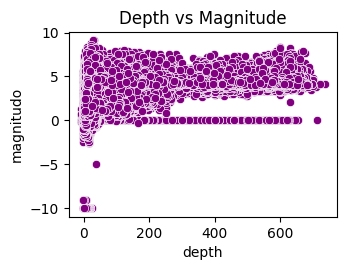

In [18]:
#Depth vs Magnitude
plt.subplot(2, 2, 4)
sns.scatterplot(x='depth', y='magnitudo', data=df, color='purple')
plt.title('Depth vs Magnitude')
plt.tight_layout()
plt.show()

In [19]:
#Normalizing 
scaler = MinMaxScaler()
num_cols = ['magnitudo', 'depth', 'longitude', 'latitude']
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_scaled['geo_cluster'] = kmeans.fit_predict(df_scaled[['latitude', 'longitude']])

In [21]:
df_scaled['risk_score'] = (df_scaled['magnitudo'] * 0.7) + ((1 - df_scaled['depth']) * 0.3)

In [22]:
#Encoding
le = LabelEncoder()
cat_cols = ['place', 'status', 'data_type', 'state']
for col in cat_cols:
    df_scaled[col] = le.fit_transform(df_scaled[col])

In [23]:
print(df_scaled.head())

           time   place  status  tsunami  significance  data_type  magnitudo  \
0  631153353990   69912       5        0            96          6   0.654269   
1  631153491210  103557       5        0            31          6   0.597171   
2  631154083450  457595       5        0            19          6   0.581456   
3  631155512130   47137       5        0            15          6   0.574646   
4  631155824490  138357       5        0           134          6   0.677842   

   state  longitude  latitude     depth                              date  \
0      6   0.084251  0.850672  0.053768  1990-01-01 00:22:33.990000+00:00   
1    106   0.068854  0.603812  0.022238  1990-01-01 00:24:51.210000+00:00   
2     46   0.158871  0.717330  0.017726  1990-01-01 00:34:43.450000+00:00   
3     46   0.169871  0.710597  0.012625  1990-01-01 00:58:32.130000+00:00   
4    374   0.169627  0.692447  0.035025  1990-01-01 01:03:44.490000+00:00   

   geo_cluster  risk_score  
0            3    0.741858 

In [24]:
df_scaled.shape

(3428882, 14)

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3428882 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 340.1+ MB
None


In [26]:
#Sesmic sensor api

In [27]:
def fetch_earthquakes(starttime, endtime, minmagnitude=4.5):
    url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
    params = {
        "format": "geojson",
        "starttime": starttime,
        "endtime": endtime,
        "minmagnitude": minmagnitude
    }
    resp = requests.get(url, params=params)
    resp.raise_for_status()
    data = resp.json()
    records = []
    for feat in data.get("features", []):
        props = feat["properties"]
        geom = feat["geometry"]
        coords = geom["coordinates"]
        records.append({
            "time": pd.to_datetime(props["time"], unit="ms"),
            "place": props.get("place"),
            "magnitude": props.get("mag"),
            "longitude": coords[0],
            "latitude": coords[1],
            "depth": coords[2],
            "tsunami": props.get("tsunami"),
            "sig": props.get("sig"),
            "alert": props.get("alert")
        })
    df = pd.DataFrame(records)
    return df

In [28]:
dft = fetch_earthquakes("2025-09-14", "2025-10-14", minmagnitude=4.5)
print(dft.shape)

(836, 9)


In [69]:
print(dft.columns.tolist())

['time', 'place', 'magnitude', 'longitude', 'latitude', 'depth', 'tsunami', 'sig', 'alert']


In [29]:
print(dft.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       836 non-null    datetime64[ns]
 1   place      836 non-null    object        
 2   magnitude  836 non-null    float64       
 3   longitude  836 non-null    float64       
 4   latitude   836 non-null    float64       
 5   depth      836 non-null    float64       
 6   tsunami    836 non-null    int64         
 7   sig        836 non-null    int64         
 8   alert      81 non-null     object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 58.9+ KB
None


In [30]:
print(dft.head())

                     time                                 place  magnitude  \
0 2025-10-13 18:58:40.258      79 km S of Calingasta, Argentina        4.8   
1 2025-10-13 18:49:57.292    59 km E of Severo-Kuril’sk, Russia        4.5   
2 2025-10-13 17:40:01.308  75 km SSE of Severo-Kuril’sk, Russia        4.5   
3 2025-10-13 16:40:22.211     80 km NNW of Fangale’ounga, Tonga        4.6   
4 2025-10-13 16:27:42.209     198 km SSE of Vilyuchinsk, Russia        4.5   

   longitude  latitude    depth  tsunami  sig alert  
0   -69.4216  -32.0499  113.255        0  358  None  
1   156.9695   50.6405   47.310        0  312  None  
2   156.6747   50.0975   35.000        0  312  None  
3  -174.6454  -19.0920   94.206        0  326  None  
4   159.7371   51.3480   39.064        0  312  None  


In [31]:
#Before preprocessing
print(dft.isnull().sum())

time           0
place          0
magnitude      0
longitude      0
latitude       0
depth          0
tsunami        0
sig            0
alert        755
dtype: int64


In [32]:
dft.drop_duplicates(inplace=True)

In [33]:
for col in dft.columns:
    if dft[col].dtype in ['float64', 'int64']:
        dft[col].fillna(dft[col].median(), inplace=True)
    else:
        dft[col].fillna(dft[col].mode()[0], inplace=True)

C:\Users\Akshaya\AppData\Local\Temp\ipykernel_24704\3377275084.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dft[col].fillna(dft[col].mode()[0], inplace=True)
C:\Users\Akshaya\AppData\Local\Temp\ipykernel_24704\3377275084.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [34]:
dft['alert'] = dft['alert'].fillna('no_alert')

In [35]:
#After preprocessing
print(dft.isnull().sum())

time         0
place        0
magnitude    0
longitude    0
latitude     0
depth        0
tsunami      0
sig          0
alert        0
dtype: int64


In [36]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

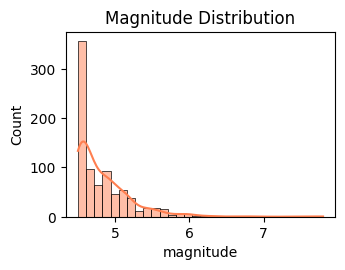

In [37]:
# Magnitude Distribution
plt.subplot(2, 2, 1)
sns.histplot(dft['magnitude'], bins=30, kde=True, color='coral')
plt.title('Magnitude Distribution')
plt.tight_layout()
plt.show()

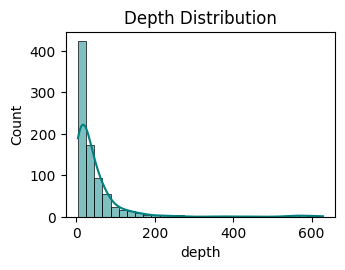

In [38]:
# Depth Distribution
plt.subplot(2, 2, 2)
sns.histplot(dft['depth'], bins=30, kde=True, color='teal')
plt.title('Depth Distribution')
plt.tight_layout()
plt.show()

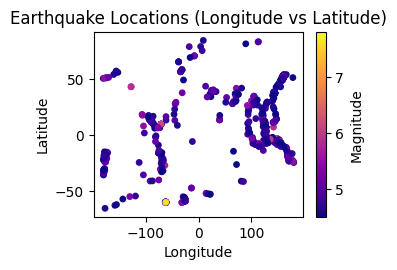

In [39]:
# Spatial Map of Earthquakes
plt.subplot(2, 2, 3)
plt.scatter(dft['longitude'], dft['latitude'], c=dft['magnitude'], cmap='plasma', s=15)
plt.colorbar(label='Magnitude')
plt.title('Earthquake Locations (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

In [40]:
#Normalizing
scaler = MinMaxScaler()
num_cols = ['magnitude', 'depth', 'longitude', 'latitude']
dft_scaled = dft.copy()
dft_scaled[num_cols] = scaler.fit_transform(dft[num_cols])

In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
dft_scaled['geo_cluster'] = kmeans.fit_predict(dft_scaled[['latitude', 'longitude']])

In [42]:
dft_scaled['risk_score'] = (dft_scaled['magnitude'] * 0.7) + ((1 - dft_scaled['depth']) * 0.3)

In [43]:
#Encoding
le = LabelEncoder()
if 'alert' in dft_scaled.columns:
    dft_scaled['alert'] = le.fit_transform(dft_scaled['alert'].astype(str))
dft_scaled['place'] = le.fit_transform(dft_scaled['place'].astype(str))

In [44]:
df_scaled.shape

(3428882, 14)

In [45]:
print(dft.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       836 non-null    datetime64[ns]
 1   place      836 non-null    object        
 2   magnitude  836 non-null    float64       
 3   longitude  836 non-null    float64       
 4   latitude   836 non-null    float64       
 5   depth      836 non-null    float64       
 6   tsunami    836 non-null    int64         
 7   sig        836 non-null    int64         
 8   alert      836 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 58.9+ KB
None


In [46]:
#soil data

In [47]:
file_path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\DSMW\DSMW.shp"
gdf = gpd.read_file(file_path)

In [68]:
print(gdf.columns.tolist())

['SNUM', 'FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2', 'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTCODE', 'CNTNAME', 'SQKM', 'COUNTRY', 'geometry', 'longitude', 'latitude', 'geo_cluster', 'soil_score']


In [48]:
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34112 entries, 0 to 34111
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SNUM        34112 non-null  int32   
 1   FAOSOIL     34112 non-null  object  
 2   DOMSOI      34112 non-null  object  
 3   PHASE1      7653 non-null   object  
 4   PHASE2      449 non-null    object  
 5   MISCLU1     27930 non-null  object  
 6   MISCLU2     27420 non-null  object  
 7   PERMAFROST  27420 non-null  object  
 8   CNTCODE     34112 non-null  int64   
 9   CNTNAME     34112 non-null  object  
 10  SQKM        34112 non-null  float64 
 11  COUNTRY     34112 non-null  object  
 12  geometry    34112 non-null  geometry
dtypes: float64(1), geometry(1), int32(1), int64(1), object(9)
memory usage: 3.3+ MB
None


In [49]:
print(gdf.head())

   SNUM FAOSOIL DOMSOI PHASE1 PHASE2 MISCLU1 MISCLU2 PERMAFROST  CNTCODE  \
0  3479  Rx1-2c     Rx   None   None       0       0          1       85   
1  6998      GL     GL   None   None       0       0          1       85   
2  6998      GL     GL   None   None       0       0          1       85   
3  6998      GL     GL   None   None       0       0          1       85   
4  3479  Rx1-2c     Rx   None   None       0       0          1       85   

  CNTNAME    SQKM    COUNTRY  \
0      GL  4194.0  GREENLAND   
1      GL  8798.0  GREENLAND   
2      GL   659.0  GREENLAND   
3      GL    69.0  GREENLAND   
4      GL   204.0  GREENLAND   

                                            geometry  
0  POLYGON ((-34.67598 83.59787, -34.64999 83.593...  
1  POLYGON ((-41.36428 82.79996, -41.32602 82.841...  
2  POLYGON ((-28.98742 83.50799, -28.97194 83.508...  
3  POLYGON ((-38.90607 83.29044, -39.03056 83.286...  
4  POLYGON ((-40.40554 83.33945, -40.4225 83.3419...  


In [50]:
#Before preprocessing
print(gdf.isnull().sum())

SNUM              0
FAOSOIL           0
DOMSOI            0
PHASE1        26459
PHASE2        33663
MISCLU1        6182
MISCLU2        6692
PERMAFROST     6692
CNTCODE           0
CNTNAME           0
SQKM              0
COUNTRY           0
geometry          0
dtype: int64


In [51]:
#Handling missing values
for col in gdf.columns:
    if gdf[col].isnull().all():
        continue  
    if gdf[col].dtype in ['float64', 'int64']:
        gdf[col].fillna(gdf[col].median(), inplace=True)
    elif gdf[col].dtype == 'geometry':
        gdf = gdf[gdf.geometry.notnull()]  
    else:
        gdf[col].fillna(gdf[col].mode()[0], inplace=True)

C:\Users\Akshaya\AppData\Local\Temp\ipykernel_24704\2143400922.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf[col].fillna(gdf[col].mode()[0], inplace=True)
C:\Users\Akshaya\AppData\Local\Temp\ipykernel_24704\2143400922.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [52]:
#Assign CRS
if gdf.crs is None:
    print("No CRS found. Assigning EPSG:4326 (WGS84)...")
    gdf.set_crs(epsg=4326, inplace=True)
else:
    print(f"Existing CRS detected: {gdf.crs}")
print("CRS assigned as:", gdf.crs)

No CRS found. Assigning EPSG:4326 (WGS84)...
CRS assigned as: EPSG:4326


In [53]:
#Compute Centroid Coordinates 
gdf['longitude'] = gdf.geometry.centroid.x
gdf['latitude'] = gdf.geometry.centroid.y
print("Centroid coordinates computed successfully.")
print(gdf[['longitude', 'latitude']].head())

C:\Users\Akshaya\AppData\Local\Temp\ipykernel_24704\1456764024.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['longitude'] = gdf.geometry.centroid.x
C:\Users\Akshaya\AppData\Local\Temp\ipykernel_24704\1456764024.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['latitude'] = gdf.geometry.centroid.y


Centroid coordinates computed successfully.
   longitude   latitude
0 -31.681149  83.249517
1 -36.553671  82.959486
2 -28.392435  83.326464
3 -39.263981  83.341253
4 -39.761520  83.230688


In [54]:
#Encoding
le = LabelEncoder()
cat_cols = ['FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2', 'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTNAME', 'COUNTRY']
for col in cat_cols:
    if col in gdf.columns:
        gdf[col] = le.fit_transform(gdf[col].astype(str))

In [55]:
#Normalizing
scaler = MinMaxScaler()
num_cols = [c for c in ['SNUM', 'CNTCODE', 'SQKM'] if c in gdf.columns]
if num_cols:
    gdf[num_cols] = scaler.fit_transform(gdf[num_cols])
    print("Numeric columns normalized")
else:
    print("No numeric columns found for normalization.")

Numeric columns normalized


In [56]:
#Create Spatial Clusters
coords = gdf[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
gdf['geo_cluster'] = kmeans.fit_predict(coords)
print("Spatial clustering complete. Column 'geo_cluster' added.")

Spatial clustering complete. Column 'geo_cluster' added.


In [57]:
#Computing soil score
if all(col in gdf.columns for col in ['SQKM', 'SNUM']):
    gdf['soil_score'] = (gdf['SQKM'] * 0.6) + (gdf['SNUM'] * 0.4)
    print("'soil_score' calculated successfully.")
else:
    print("'SQKM' or 'SNUM' missing. Skipping soil score computation.")

'soil_score' calculated successfully.


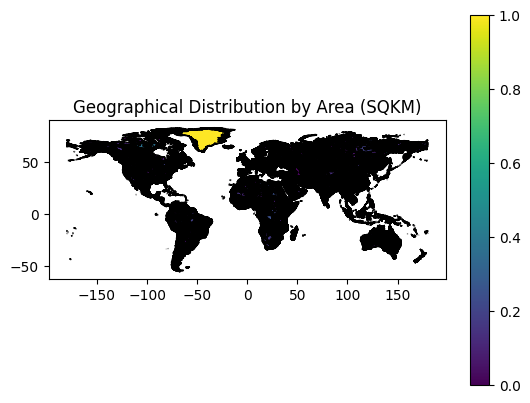

In [58]:
#Plot base map
gdf.plot(column='SQKM', cmap='viridis', legend=True, edgecolor='black')
plt.title('Geographical Distribution by Area (SQKM)')
plt.show()

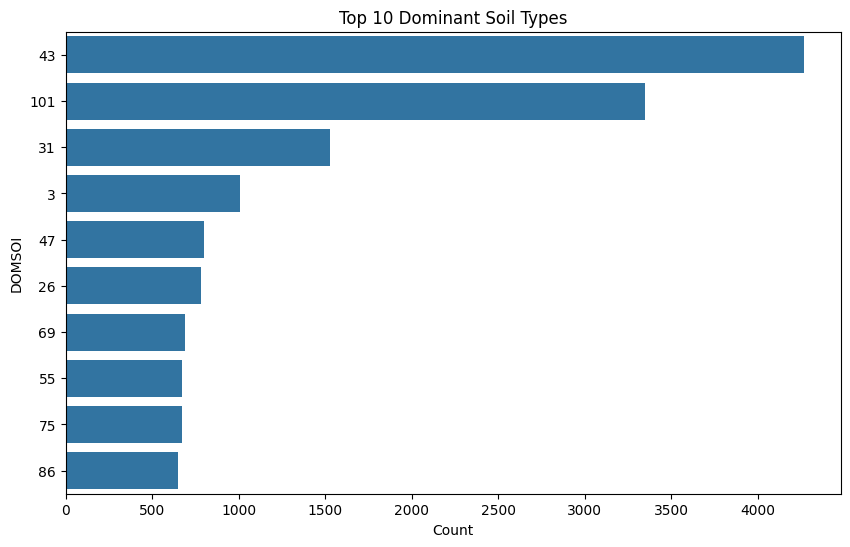

In [59]:
#Plot categorical distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='DOMSOI', data=gdf, order=gdf['DOMSOI'].value_counts().index[:10])
plt.title('Top 10 Dominant Soil Types')
plt.xlabel('Count')
plt.ylabel('DOMSOI')
plt.show()

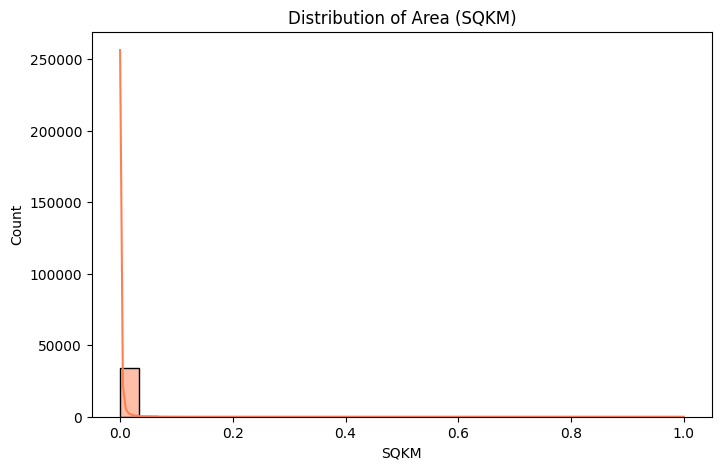

In [60]:
#Histogram of Area 
plt.figure(figsize=(8, 5))
sns.histplot(gdf['SQKM'], bins=30, kde=True, color='coral')
plt.title('Distribution of Area (SQKM)')
plt.show()

In [61]:
#After preprocessing
print(gdf.isnull().sum())

SNUM           0
FAOSOIL        0
DOMSOI         0
PHASE1         0
PHASE2         0
MISCLU1        0
MISCLU2        0
PERMAFROST     0
CNTCODE        0
CNTNAME        0
SQKM           0
COUNTRY        0
geometry       0
longitude      0
latitude       0
geo_cluster    0
soil_score     0
dtype: int64


In [62]:
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34112 entries, 0 to 34111
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   SNUM         34112 non-null  float64 
 1   FAOSOIL      34112 non-null  int32   
 2   DOMSOI       34112 non-null  int32   
 3   PHASE1       34112 non-null  int32   
 4   PHASE2       34112 non-null  int32   
 5   MISCLU1      34112 non-null  int32   
 6   MISCLU2      34112 non-null  int32   
 7   PERMAFROST   34112 non-null  int32   
 8   CNTCODE      34112 non-null  float64 
 9   CNTNAME      34112 non-null  int32   
 10  SQKM         34112 non-null  float64 
 11  COUNTRY      34112 non-null  int32   
 12  geometry     34112 non-null  geometry
 13  longitude    34112 non-null  float64 
 14  latitude     34112 non-null  float64 
 15  geo_cluster  34112 non-null  int32   
 16  soil_score   34112 non-null  float64 
dtypes: float64(6), geometry(1), int32(10)
memory usage: 3.1 MB
No

In [ ]:
#Milestone-2

In [ ]:
#Columns in historial earthquake data and seismic data
cols_df = set(df_scaled.columns)
cols_dft = set(dft_scaled.columns)

In [107]:
expected_cols = [
    'time', 'place', 'magnitude', 'magnitudo',
    'longitude', 'latitude', 'depth', 'tsunami', 'sig', 'alert',
    'geo_cluster', 'risk_score',
    'state', 'DOMSOI', 'SNUM', 'SQKM']

In [108]:
common_cols = list((cols_df & cols_dft) & set(expected_cols))
print("Common columns:", common_cols)

Common columns: ['time', 'latitude', 'depth', 'geo_cluster', 'place', 'longitude', 'tsunami', 'risk_score']


In [109]:
eq_combined = pd.concat(
    [df_scaled[common_cols], dft_scaled[common_cols]],
    ignore_index=True
)
print("Combined Earthquake Data Shape:", eq_combined.shape)

Combined Earthquake Data Shape: (3429718, 8)


In [136]:
#Aggregating Soil Data 
soil_agg = gdf.groupby('geo_cluster', as_index=False).agg({
    'soil_score': 'mean',
    'SNUM': 'mean',
    'SQKM': 'mean',
    'longitude': 'mean',
    'latitude': 'mean',
    'DOMSOI': 'mean'
})
print(soil_agg.shape)

(5, 7)


In [ ]:
#Aligning clusters for Earthquake Data
coords_eq = eq_combined[['latitude', 'longitude']]
eq_combined['geo_cluster'] = kmeans.predict(coords_eq)

In [ ]:
#Merging
eq_soil_merged = pd.merge(
    eq_combined, soil_agg,
    on='geo_cluster', how='left',
    suffixes=('_x', '_y')
)
print(eq_soil_merged.shape)

(3429718, 14)


In [ ]:
eq_soil_merged.columns.tolist()

['time',
 'latitude_x',
 'depth',
 'geo_cluster',
 'place',
 'longitude_x',
 'tsunami',
 'risk_score',
 'soil_score',
 'SNUM',
 'SQKM',
 'longitude_y',
 'latitude_y',
 'DOMSOI']

In [114]:
eq_soil_merged = eq_soil_merged.drop(['longitude_y', 'latitude_y'], axis=1)

In [115]:
eq_soil_merged.columns.tolist()

['time',
 'latitude_x',
 'depth',
 'geo_cluster',
 'place',
 'longitude_x',
 'tsunami',
 'risk_score',
 'soil_score',
 'SNUM',
 'SQKM',
 'DOMSOI']

In [ ]:
#Normalizing
scaler_temp = MinMaxScaler()
eq_soil_merged[['risk_score', 'soil_score']] = scaler_temp.fit_transform(
    eq_soil_merged[['risk_score', 'soil_score']]
)

In [ ]:
#Computing Risk Index
eq_soil_merged['final_risk_index'] = (
    (eq_soil_merged['risk_score'] * 0.7) +
    (eq_soil_merged['soil_score'] * 0.3)
)

In [118]:
print(eq_soil_merged.head())

           time  latitude_x     depth  geo_cluster   place  longitude_x  \
0  631153353990    0.850672  0.053768            3   69912     0.084251   
1  631153491210    0.603812  0.022238            3  103557     0.068854   
2  631154083450    0.717330  0.017726            3  457595     0.158871   
3  631155512130    0.710597  0.012625            3   47137     0.169871   
4  631155824490    0.692447  0.035025            3  138357     0.169627   

   tsunami  risk_score  soil_score     SNUM      SQKM     DOMSOI  \
0        0    0.747723         0.0  0.14519  0.002409  58.723995   
1        0    0.716386         0.0  0.14519  0.002409  58.723995   
2        0    0.706478         0.0  0.14519  0.002409  58.723995   
3        0    0.703153         0.0  0.14519  0.002409  58.723995   
4        0    0.770446         0.0  0.14519  0.002409  58.723995   

   final_risk_index  
0          0.523406  
1          0.501470  
2          0.494534  
3          0.492207  
4          0.539312  


In [119]:
print(eq_soil_merged.dtypes)

time                 object
latitude_x          float64
depth               float64
geo_cluster           int32
place                 int32
longitude_x         float64
tsunami               int64
risk_score          float64
soil_score          float64
SNUM                float64
SQKM                float64
DOMSOI              float64
final_risk_index    float64
dtype: object


In [120]:
duplicates_count = eq_soil_merged.duplicated().sum()
print("Duplicate rows:", duplicates_count)

Duplicate rows: 1


In [121]:
eq_soil_merged = eq_soil_merged.drop_duplicates()
print("After removing duplicates:", eq_soil_merged.duplicated().sum())

After removing duplicates: 0


In [ ]:
#Risk Category Binning
eq_soil_merged['risk_category'] = pd.qcut(
    eq_soil_merged['final_risk_index'], q=3, labels=['Low', 'Medium', 'High'])
print(eq_soil_merged['risk_category'].value_counts())

risk_category
Medium    1143246
Low       1143239
High      1143232
Name: count, dtype: int64


In [ ]:
X = eq_soil_merged.drop(['final_risk_index', 'risk_category', 'risk_score', 'soil_score'],axis=1)
y = eq_soil_merged['risk_category']

In [128]:
print(eq_soil_merged.shape)

(3429717, 14)


In [130]:
print(y.value_counts())

risk_category
Medium    1143246
Low       1143239
High      1143232
Name: count, dtype: int64


In [131]:
X.columns.tolist()

['time',
 'latitude_x',
 'depth',
 'geo_cluster',
 'place',
 'longitude_x',
 'tsunami',
 'SNUM',
 'SQKM',
 'DOMSOI']

In [135]:
import os
save_path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\Final_Risk_Assessment_Dataset.csv"
eq_soil_merged.to_csv(save_path, index=False)
print(f"Dataset saved successfully at: {save_path}")

Dataset saved successfully at: C:\Users\Akshaya\OneDrive\Desktop\VI\Final_Risk_Assessment_Dataset.csv


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier, StackingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
file_path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\Final_Risk_Assessment_Dataset.csv"
df = pd.read_csv(file_path)

In [4]:
df.shape

(1048575, 14)

In [10]:
#checking for missing values
print(df.isnull().sum())

time                0
latitude_x          0
depth               0
geo_cluster         0
place               0
longitude_x         0
tsunami             0
risk_score          0
soil_score          0
SNUM                0
SQKM                0
DOMSOI              0
final_risk_index    0
risk_category       0
dtype: int64


In [11]:
print(df.columns.tolist())

['time', 'latitude_x', 'depth', 'geo_cluster', 'place', 'longitude_x', 'tsunami', 'risk_score', 'soil_score', 'SNUM', 'SQKM', 'DOMSOI', 'final_risk_index', 'risk_category']


In [12]:
print(df.dtypes)

time                 object
latitude_x          float64
depth               float64
geo_cluster           int64
place                 int64
longitude_x         float64
tsunami               int64
risk_score          float64
soil_score          float64
SNUM                float64
SQKM                float64
DOMSOI              float64
final_risk_index    float64
risk_category        object
dtype: object


In [13]:
#Checking for duplicates
total_duplicates = df.duplicated().sum()
print(total_duplicates)

0


In [14]:
#Converting 'time' column to datetime 
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df.drop(columns=['time'], inplace=True)

In [15]:
#Encoding
le = LabelEncoder()
for col in ['geo_cluster', 'place', 'risk_category']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [16]:
#Scaling
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [17]:
print(df['risk_category'].value_counts())   

risk_category
2    1143246
1    1143239
0    1143232
Name: count, dtype: int64


In [18]:
X = df.drop(columns=['risk_category'])  
y = df['risk_category']  

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [21]:
print( X_train.isnull().sum().sum())

0


In [22]:
#Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)

In [23]:
print("Logistic Regression")
print("Accuracy:", acc2)
print("MAE:", round(mae2, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

Logistic Regression
Accuracy: 0.9972402994996676
MAE: 0.005

Confusion Matrix:
 [[227153      0   1494]
 [     0 228580     68]
 [    51    280 228318]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    228647
           1       1.00      1.00      1.00    228648
           2       0.99      1.00      1.00    228649

    accuracy                           1.00    685944
   macro avg       1.00      1.00      1.00    685944
weighted avg       1.00      1.00      1.00    685944



In [24]:
#correlation 
corr_matrix = df.corr(numeric_only=True)
corr_with_target = corr_matrix['risk_category'].sort_values(ascending=False)
print(corr_with_target)

risk_category       1.000000
latitude_x          0.288400
hour               -0.000082
day                -0.000087
year               -0.000087
month              -0.000088
tsunami            -0.025206
place              -0.025660
depth              -0.079040
longitude_x        -0.379377
final_risk_index   -0.527841
risk_score         -0.527841
geo_cluster              NaN
soil_score               NaN
SNUM                     NaN
SQKM                     NaN
DOMSOI                   NaN
Name: risk_category, dtype: float64


In [25]:
#Checking for missing values in X_train
print(X_train.isnull().sum())

latitude_x          0
depth               0
geo_cluster         0
place               0
longitude_x         0
tsunami             0
risk_score          0
soil_score          0
SNUM                0
SQKM                0
DOMSOI              0
final_risk_index    0
year                0
month               0
day                 0
hour                0
dtype: int64


In [ ]:
#Drop constant columns 
constant_cols = [col for col in X_train.columns if X_train[col].nunique() <= 1]
print("Constant columns to drop:", constant_cols)
X_train.drop(columns=constant_cols, inplace=True)
X_test.drop(columns=constant_cols, inplace=True)

Constant columns to drop: ['geo_cluster', 'soil_score', 'SNUM', 'SQKM', 'DOMSOI']


In [27]:
print(X_train.columns)

Index(['latitude_x', 'depth', 'place', 'longitude_x', 'tsunami', 'risk_score',
       'final_risk_index', 'year', 'month', 'day', 'hour'],
      dtype='object')


In [28]:
X_no_leak = X.drop(columns=['risk_score', 'final_risk_index'], errors='ignore')

In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_no_leak, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
X_train2 = X_train2.fillna(X_train2.mean())
X_test2 = X_test2.fillna(X_test2.mean())

In [37]:
print("Columns after preprocessing:")
print(df.columns.tolist())

Columns after preprocessing:
['latitude_x', 'depth', 'geo_cluster', 'place', 'longitude_x', 'tsunami', 'risk_score', 'soil_score', 'SNUM', 'SQKM', 'DOMSOI', 'final_risk_index', 'risk_category', 'year', 'month', 'day', 'hour']


In [38]:
df.tail()

,latitude_x,depth,geo_cluster,place,longitude_x,tsunami,risk_score,soil_score,SNUM,SQKM,DOMSOI,final_risk_index,risk_category,year,month,day,hour
3429712,0.776986,0.009758,0.0,0.000510,0.944212,0.0,0.334453,0.0,0.0,0.0,0.0,0.334453,1,1.0,0.888889,0.448276,0.217391
3429713,0.631730,0.009758,0.0,0.000488,0.643136,0.0,0.312666,0.0,0.0,0.0,0.0,0.312666,1,1.0,0.888889,0.448276,0.173913
3429714,0.394041,0.188667,0.0,0.000721,0.862578,0.0,0.235750,0.0,0.0,0.0,0.0,0.235750,1,1.0,0.888889,0.448276,0.173913
3429715,0.283500,0.356101,0.0,0.001022,0.315563,0.0,0.227733,0.0,0.0,0.0,0.0,0.227733,1,1.0,0.888889,0.448276,0.086957
3429716,0.452388,0.009758,0.0,0.001081,0.766137,0.0,0.290878,0.0,0.0,0.0,0.0,0.290878,1,1.0,0.888889,0.448276,0.043478


In [34]:
#Logistic Regression
log_clf = LogisticRegression(max_iter=500, random_state=42)
log_clf.fit(X_train2, y_train2)
y_pred2 = log_clf.predict(X_test2)
acc2 = accuracy_score(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)

In [35]:
print("Logistic Regression")
print("Accuracy:", acc2)
print("MAE:", round(mae2, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred2))
print("\nClassification Report:\n", classification_report(y_test2, y_pred2))

Logistic Regression
Accuracy: 0.5063955658187841
MAE: 0.6399

Confusion Matrix:
 [[114612  23200  90835]
 [  4553  56786 167309]
 [  9521  43167 175961]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.50      0.64    228647
           1       0.46      0.25      0.32    228648
           2       0.41      0.77      0.53    228649

    accuracy                           0.51    685944
   macro avg       0.59      0.51      0.50    685944
weighted avg       0.59      0.51      0.50    685944



In [80]:
#Decision Tree
dt_clf2 = DecisionTreeClassifier(random_state=42)
dt_clf2.fit(X_train2, y_train2)
y_pred_dt = dt_clf2.predict(X_test2)
acc_dt = accuracy_score(y_test2, y_pred_dt)
mae_dt = mean_absolute_error(y_test2, y_pred_dt)

In [81]:
print("Decision Tree")
print("Accuracy:", acc_dt)
print("MAE:", round(mae_dt, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_dt))

Decision Tree
Accuracy: 0.6192240182872071
MAE: 0.5196

Confusion Matrix:
 [[164204  17827  46616]
 [ 18468 144663  65517]
 [ 48620  64143 115886]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71    228647
           1       0.64      0.63      0.64    228648
           2       0.51      0.51      0.51    228649

    accuracy                           0.62    685944
   macro avg       0.62      0.62      0.62    685944
weighted avg       0.62      0.62      0.62    685944



In [33]:
#Random Forest
rf_clf2 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf2.fit(X_train2, y_train2)
y_pred_rf = rf_clf2.predict(X_test2)
acc_rf = accuracy_score(y_test2, y_pred_rf)
mae_rf = mean_absolute_error(y_test2, y_pred_rf)

In [35]:
print("Random Forest")
print("Accuracy:", acc_rf)
print("MAE:", round(mae_rf, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_rf))

Random Forest
Accuracy: 0.6847891373056693
MAE: 0.4302

Confusion Matrix:
 [[167932  13780  46935]
 [  7497 167556  53595]
 [ 31918  62492 134239]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77    228647
           1       0.69      0.73      0.71    228648
           2       0.57      0.59      0.58    228649

    accuracy                           0.68    685944
   macro avg       0.69      0.68      0.69    685944
weighted avg       0.69      0.68      0.69    685944



import joblib
joblib.dump(rf_clf2, "random_forest_model.pkl")

In [84]:
#HistGradientBoosting
hgb_clf2 = HistGradientBoostingClassifier(random_state=42)
hgb_clf2.fit(X_train2, y_train2)
y_pred_hgb = hgb_clf2.predict(X_test2)
acc_hgb = accuracy_score(y_test2, y_pred_hgb)
mae_hgb = mean_absolute_error(y_test2, y_pred_hgb)

In [86]:
print("HistGradientBoosting Results:")
print("Accuracy:", acc_hgb)
print("MAE:", round(mae_hgb, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_hgb))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_hgb))

HistGradientBoosting Results:
Accuracy: 0.6762315874182149
MAE: 0.4364

Confusion Matrix:
 [[156294  17403  54950]
 [  5400 173983  49265]
 [ 22313  72756 133580]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.76    228647
           1       0.66      0.76      0.71    228648
           2       0.56      0.58      0.57    228649

    accuracy                           0.68    685944
   macro avg       0.69      0.68      0.68    685944
weighted avg       0.69      0.68      0.68    685944



In [ ]:
#Milestone-3

In [87]:
#XGBoost
xgb_clf2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf2.fit(X_train2, y_train2)
y_pred_xgb = xgb_clf2.predict(X_test2)
acc_xgb = accuracy_score(y_test2, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test2, y_pred_xgb)

In [88]:
print("XGBoost")
print("Accuracy:", acc_xgb)
print("MAE:", round(mae_xgb, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_xgb))

XGBoost
Accuracy: 0.6800074058523727
MAE: 0.4314

Confusion Matrix:
 [[157289  17083  54275]
 [  5204 174024  49420]
 [ 22166  71349 135134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76    228647
           1       0.66      0.76      0.71    228648
           2       0.57      0.59      0.58    228649

    accuracy                           0.68    685944
   macro avg       0.69      0.68      0.68    685944
weighted avg       0.69      0.68      0.68    685944



In [91]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
sample_size = 50000
X_sample = X_train2.sample(n=sample_size, random_state=42)
y_sample = y_train2.loc[X_sample.index]
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',    
    predictor='cpu_predictor',
    random_state=42
)
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)
xgb_search.fit(X_sample, y_sample)
print("Best Parameters:", xgb_search.best_params_)
print("Best CV Score:", round(xgb_search.best_score_, 4))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV Score: 0.6618


In [94]:
#XGBoost Model
final_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    predictor='cpu_predictor',
    subsample=0.8,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    colsample_bytree=1.0,
    random_state=42
)

In [95]:
final_xgb.fit(X_train2, y_train2)
y_pred_xgb = final_xgb.predict(X_test2)
acc_xgb = accuracy_score(y_test2, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test2, y_pred_xgb)

In [96]:
print("XGBoost Results:")
print("Accuracy:", acc_xgb)
print("MAE:", round(mae_xgb, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_xgb))

XGBoost Results:
Accuracy: 0.6763686248440106
MAE: 0.4351

Confusion Matrix:
 [[156123  18038  54486]
 [  5302 174563  48783]
 [ 21987  73397 133265]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.76    228647
           1       0.66      0.76      0.71    228648
           2       0.56      0.58      0.57    228649

    accuracy                           0.68    685944
   macro avg       0.69      0.68      0.68    685944
weighted avg       0.69      0.68      0.68    685944



In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train2, y_train2)

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

In [100]:
#XGBoost Model
final_xgb1 = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    predictor='cpu_predictor',
    subsample=0.8,
    n_estimators=600,
    max_depth=8,
    learning_rate=0.05,
    colsample_bytree=1.0,
    random_state=42
)

In [101]:
final_xgb1.fit(X_train2, y_train2)
y_pred_xgb1 = final_xgb1.predict(X_test2)
acc_xgb = accuracy_score(y_test2, y_pred_xgb1)
mae_xgb = mean_absolute_error(y_test2, y_pred_xgb1)

In [102]:
print("XGBoost")
print("Accuracy:", acc_xgb)
print("MAE:", round(mae_xgb, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_xgb1))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_xgb1))

XGBoost
Accuracy: 0.6876640075574683
MAE: 0.4229

Confusion Matrix:
 [[159018  15770  53859]
 [  4825 174639  49184]
 [ 21989  68618 138042]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77    228647
           1       0.67      0.76      0.72    228648
           2       0.57      0.60      0.59    228649

    accuracy                           0.69    685944
   macro avg       0.70      0.69      0.69    685944
weighted avg       0.70      0.69      0.69    685944



In [103]:
joblib.dump(final_xgb1, "xgboost.pkl")

['xgboost.pkl']

In [ ]:
import os
print(os.getcwd())

c:\Users\Akshaya\OneDrive\Desktop


In [105]:
print(y_train2.value_counts(normalize=True))

risk_category
2    0.333336
1    0.333333
0    0.333331
Name: proportion, dtype: float64


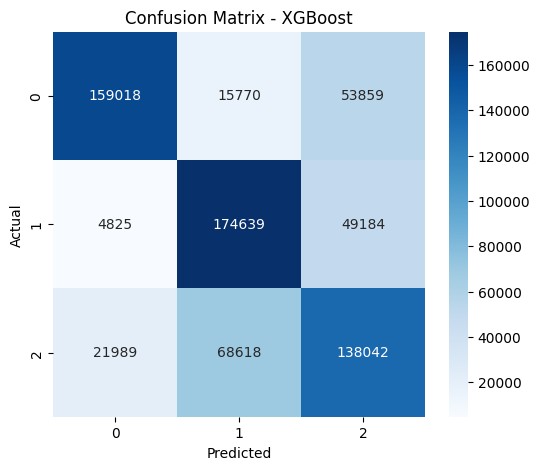

In [109]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test2, y_pred_xgb1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test2, y_pred_xgb1)
mse = mean_squared_error(y_test2, y_pred_xgb1)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Absolute Error (MAE): 0.4229
Mean Squared Error (MSE): 0.6441


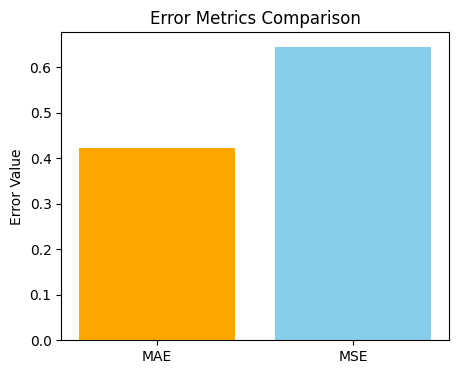

In [113]:
plt.figure(figsize=(5, 4))
plt.bar(['MAE', 'MSE'], [mae, mse], color=['orange', 'skyblue'])
plt.title("Error Metrics Comparison")
plt.ylabel("Error Value")
plt.show()

In [114]:
importances = final_xgb1.feature_importances_
features = X_train2.columns

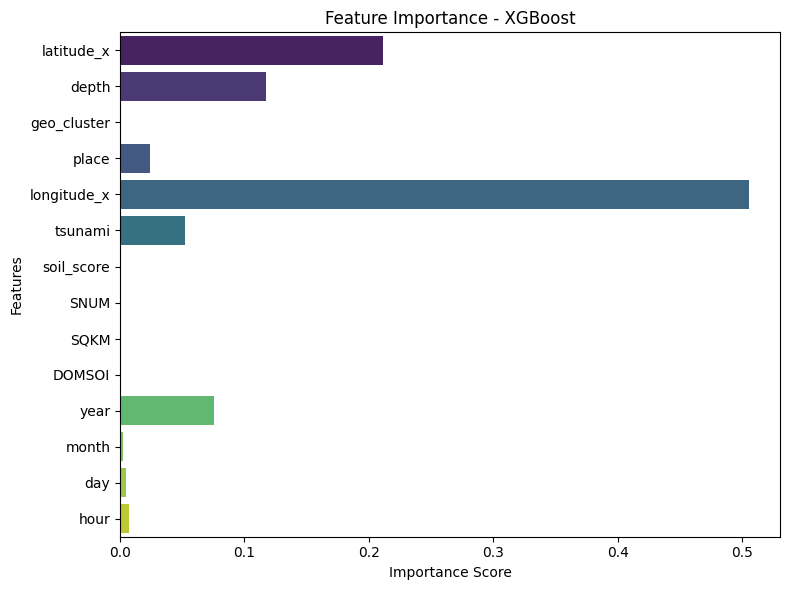

In [115]:
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, orient='h', palette='viridis')
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
important_features = ['longitude_x', 'latitude_x', 'depth', 'year']
X_important = X_train2[important_features]
X_test_important = X_test2[important_features]
xgb_model.fit(X_important, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...)

In [48]:
y_pred = xgb_model.predict(X_test_important)
accuracy = accuracy_score(y_test2, y_pred)
mae = mean_absolute_error(y_test2, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Accuracy: 0.6857
Mean Absolute Error: 0.4250


In [50]:
joblib.dump(xgb_model, "xgboost_final.pkl")

['xgboost_final.pkl']

In [52]:
import joblib
model_path = r"C:\Users\Akshaya\OneDrive\Desktop\xgboost_final.pkl"
xgb_model = joblib.load(model_path)

In [67]:
data = {
    'longitude_x': [0.068854],
    'latitude_x': [0.603812],
    'depth': [0.022238],
    'year': [0.0]
}

In [68]:
X_single = pd.DataFrame(data)

In [74]:
actual_value = 1

In [75]:
print("Predicted Risk Category:", prediction[0])
print("Actual Risk Category:", actual_value)

Predicted Risk Category: 1
Actual Risk Category: 1
